In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# funkcja rzutująca punkty na linie o kierunku a
def rzutowanie(X,a):
    x_tmp = (X[:,1] * a + X[:,0]) / (a ** 2 + 1)
    y_tmp = a * x_tmp   
    return np.array([x_tmp,y_tmp]).T

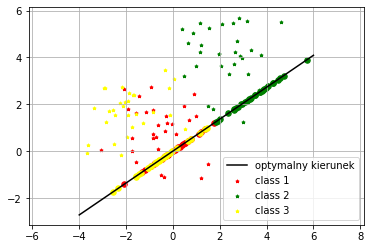

In [4]:
# macierz kowiarancji
cov = np.array([[1,0],[0,1]])

# losowanie 30 punktów z rozkładu normalnego o średniej mean_1 i macierzy kowariancji cov
mean_1 = np.array([-1,1])
mean_1_t = np.array([-1,1])[np.newaxis].T
c1 = np.random.multivariate_normal(mean_1, cov, 30)
n1 = np.size(c1[:,0])

mean_2 = np.array([2,4])
mean_2_t = np.array([2,4])[np.newaxis].T
c2 = np.random.multivariate_normal(mean_2, cov, 30)
n2 = np.size(c2[:,0])

mean_3 = np.array([-2,2])
mean_3_t = np.array([-2,2])[np.newaxis].T
c3 = np.random.multivariate_normal(mean_3, cov, 30)
n3 = np.size(c3[:,0])

# Ogólna liczność oraz liczba klas
n = n1 + n2 + n3
g = 3

# wyznaczanie średniej dla wszystkich punktów
tmp = np.mean((c1,c2,c3),axis=1)
mean = np.mean(tmp,axis=0)[np.newaxis].T

# Macierz zmienności międzygrupowej
B = ((n1 * (mean_1_t - mean)) @ (mean_1_t - mean).T + (n2 * (mean_2_t - mean)) @ (mean_2_t - mean).T + (n3 * (mean_3_t - mean)) @ 
      (mean_3_t - mean).T)/ (g-1)

# Macierz zmienności wewnątrzgrupowej
W = 1 / (n - g) * ((n1 - 1) * cov + (n2 - 1) * cov + (n3 - 1) * cov)

# Macierz pomocnicza
W_rev = np.linalg.inv(W)
U = W_rev @ B

# wartosci i wektory własne
w, v= np.linalg.eig(U)
t = v[np.argmax(np.max(v,axis=1))]

# rysowanie punktów
plt.scatter(c1[:,0],c1[:,1], color='red', s = 10 ,label="class 1", marker = "*")
plt.scatter(c2[:,0],c2[:,1], color='green', s = 10 ,label="class 2", marker = "*")
plt.scatter(c3[:,0],c3[:,1], color='yellow', s = 10 ,label="class 3", marker = "*")

# rysowanie prostej o nachyleniu a 
x = np.linspace(-4,6)
a = -t[1]/t[0]
y = a * x
plt.plot(x,y,"r",color="black",label="optymalny kierunek")


# rysowanie zrzutowanych punktów 
D1 = rzutowanie(c1,a)
D2 = rzutowanie(c2,a)
D3 = rzutowanie(c3,a)

plt.scatter(D1[:,0],D1[:,1], color='red', s = 30, marker = "o")
plt.scatter(D2[:,0],D2[:,1], color='green', s = 30, marker = "o")
plt.scatter(D3[:,0],D3[:,1], color='yellow', s = 30, marker = "o")

plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

### Jak widać na powyższym wykresie, metodą LDA w tym wypadku jesteśmy w stanie rozdzielić tylko 2 klasy spośród 3